In [91]:
import warnings


In [92]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#set the backgroung style sheet
sns.set_style("whitegrid")
%matplotlib inline

In [93]:
#importing the libaries required for data visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [94]:
#load the csv file in a dataframe using read_csv function
df = pd.read_csv("C:/Users/Rahul Mukthineni/Desktop/drug_consumption.csv",encoding="latin-1")


In [95]:
#make a copy of the dataframe
copy_df = df.copy() 
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [96]:
#print first 5 rows of the dataset
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

In [97]:
#more information about the data
df.describe()

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity       Nscore       Escore       Oscore       Ascore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.309577     0.000047    -0.000163    -0.000534    -0.000245   
std       0.166226     0.998106     0.997448     0.996229     0.997440   
min      -1.107020    -3.464360    -3.273930    -3.273930    -3.464360   
25%      -0.316850    -0.678250    -0.695090    -0.717270    -0.606330   
50%      -0.316850     0.042570     0.003320    -0.019280    -0.017290   
75%      -0.316850     0.629670     0.637790     0.723300     0.760960   
max       1.907250     3.273930     3.273930     2.901610     3.464360   

            Cscore    Impulsive           SS  
count  1885.000000  1885.000000  1885.000000  
mean     -0.000386     0.007216    -0.003292  
std       0.997523     0.954435     0.963701  
min      -3.464360    -2.555240    -2.078480  
25%      -0.652530    -0.711260    -0.525930  
50%      -0.006650    -0.217120     0.079870  
75%       0.584890     0.529750     0.765400  
max       3.464360     2.901610     1.921730

In [98]:
#finding whether there are any null values in the dataset
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

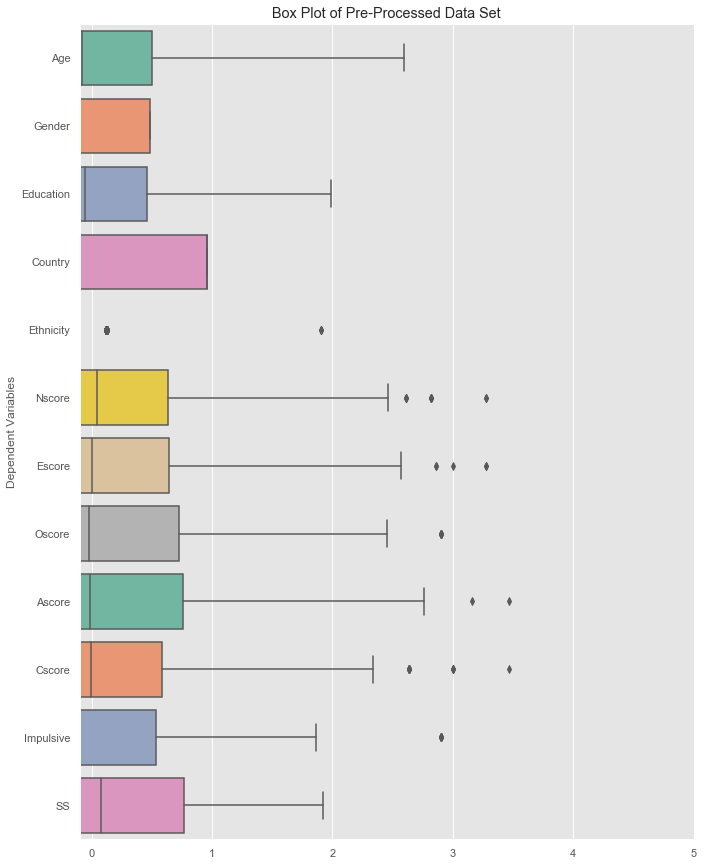

In [99]:
#data visualization using box plot on dependent variables
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))
ax.set(xlim=(-.100, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df[feature_col_names], orient = 'h', palette = 'Set2')

In [73]:
#creating 2 more dataframes for each drug
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

In [74]:
# encoding into numeric data for the original data set
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [75]:
# encoding into numeric data for the copied dataset
for column in columns:
    le = LabelEncoder()
    copy_df[column] = le.fit_transform(copy_df[column])

In [76]:
#dataset after encoding
df[columns]

Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  \
0           5       2     0       2     6         0     5     0      0   
1           5       2     2       0     6         4     6     3      0   
2           6       0     0       0     6         3     4     0      0   
3           4       0     0       3     5         2     4     2      0   
4           4       1     1       0     6         3     6     0      0   
...       ...     ...   ...     ...   ...       ...   ...   ...    ...   
1880        5       0     0       0     4         5     4     0      0   
1881        5       0     0       0     5         3     4     0      0   
1882        4       6     5       5     6         6     6     4      0   
1883        5       0     0       0     6         6     5     0      0   
1884        4       3     0       3     6         3     6     3      0   

      Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  Nicotine  \
0           0       0         0       0    0     0          0         2   
1           4       0         2       0    2     3          0         4   
2           0       0         0       0    0     0          1         0   
3           0       0         2       0    0     0          0         2   
4           1       0         0       1    0     0          2         2   
...       ...     ...       ...     ...  ...   ...        ...       ...   
1880        0       0         0       3    3     0          0         0   
1881        2       0         0       3    5     4          4         5   
1882        4       0         2       0    2     0          2         6   
1883        3       0         0       3    3     0          3         4   
1884        3       0         0       3    3     0          3         6   

      Semer  VSA  
0         0    0  
1         0    0  
2         0    0  
3         0    0  
4         0    0  
...     ...  ...  
1880      0    5  
1881      0    0  
1882      0    0  
1883      0    0  
1884      0    2  

[1885 rows x 19 columns]

In [77]:
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(columns)):
    copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
    copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'

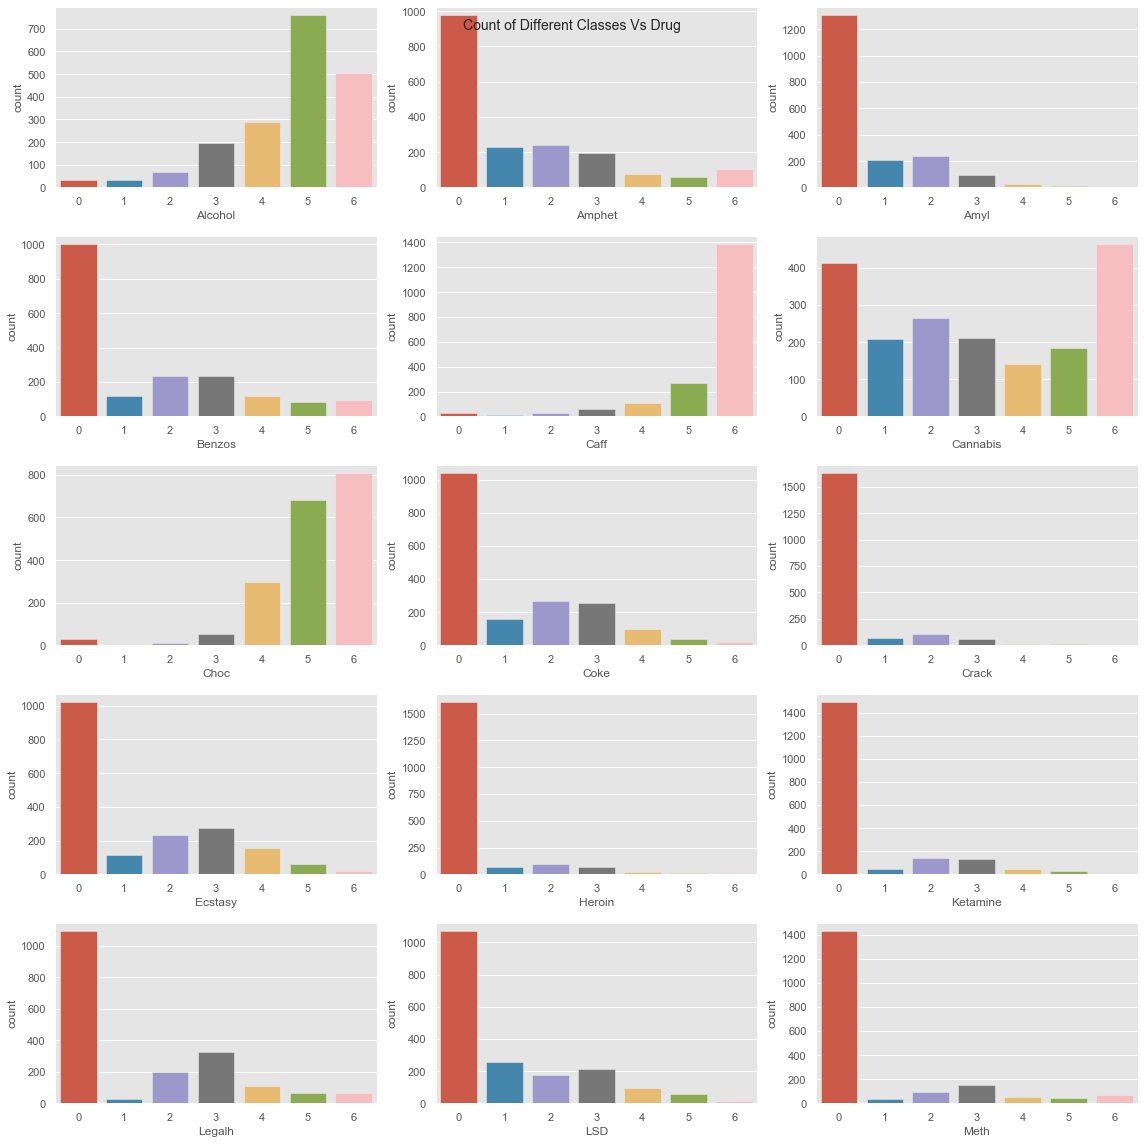

In [78]:
#Visualization of the total amount of consumption for each drug
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=columns[k], data=copy_df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()


In [79]:
#counting the total number of user or non user.
count_of_users = []
count_of_non_users = []

In [80]:
for i in range(len(columns)):
    s = copy_df.groupby([cp[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [81]:
#visualization of total user and non user of drug for every specific drug
trace1 = go.Bar(
    x=columns,
    y=count_of_users,
    name='User',
    marker = dict(color="rgb(117, 127, 221)")
)
trace2 = go.Bar(
    x=columns,
    y=count_of_non_users,
    name='Non-User',
    marker = dict(color="rgb(191, 221, 229)")
)


data = [trace1, trace2]
layout = go.Layout(
    title= 'Drug Vs User Or Non-user',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [82]:
#visualization of popluation of drug addicted for specific countries on world map
df['Country'].value_counts()
con = ['UK','USA','Canada','Australia','Ireland','New Zealand']

In [83]:
data = [dict(
        type='choropleth',
        locations = con,
        locationmode='country names',
        z=(df['Country'].value_counts().values),
        text=con,
        colorscale='portland',
        reversescale=True,
)]
layout = dict(
    title = 'A Map About Population of Drug Addicted in Each Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')


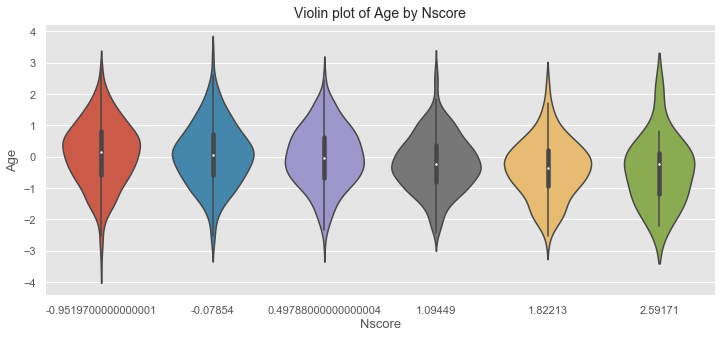

In [84]:
#Violin plot of Age vs Nscore
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Nscore', data=df)
plt.title('Violin plot of Age by Nscore',fontsize=14)
plt.xlabel('Nscore',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

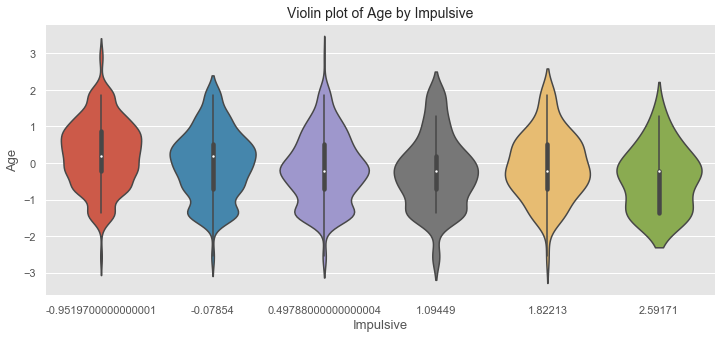

In [85]:
#violin plot of Age vs Impulsive
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Impulsive', data=df)
plt.title('Violin plot of Age by Impulsive',fontsize=14)
plt.xlabel('Impulsive',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()


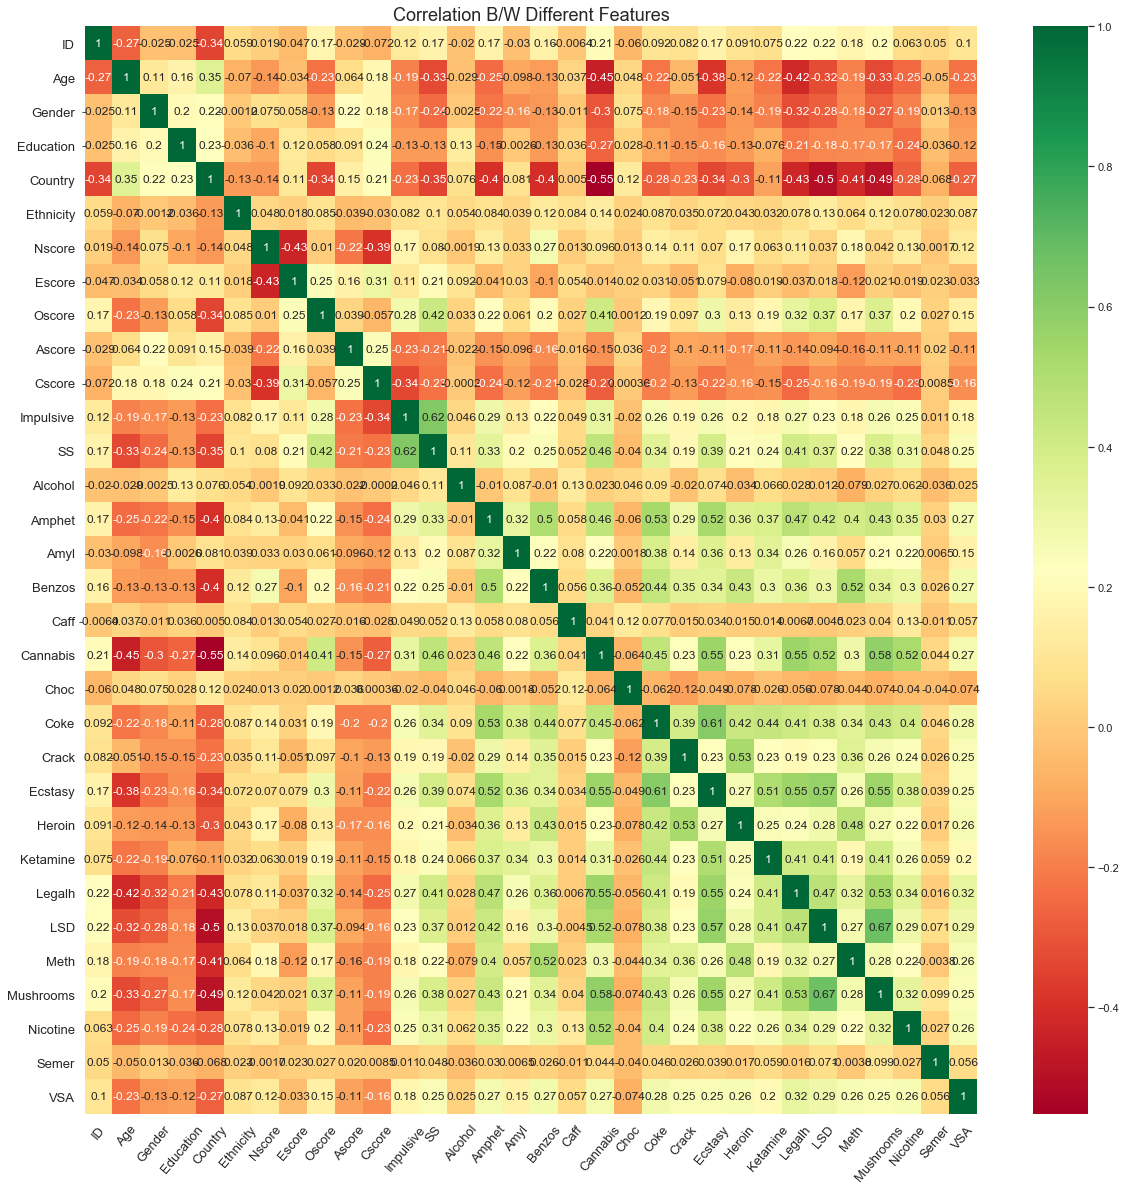

In [86]:
#heatmap to find the correlation between different Features.
corrmat = df.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

In [87]:
#Model Building
yp = []
for i in df['Benzos']:
    if(i==0):
        yp.append([1,0,0,0,0,0,0])
    elif(i==1):
        yp.append([0,1,0,0,0,0,0])
    elif(i==2):
        yp.append([0,0,1,0,0,0,0])
    elif(i==3):
        yp.append([0,0,0,1,0,0,0])
    elif(i==4):
        yp.append([0,0,0,0,1,0,0])
    elif(i==5):
        yp.append([0,0,0,0,0,1,0])
    elif(i==6):
        yp.append([0,0,0,0,0,0,1])
yp = np.array(yp)

In [25]:
#yp data frame
yp

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
#feature selection
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['Benzos']

X = df[feature_col_names].values
y = df[predicted_class_names].values

In [27]:
X

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [28]:
y

array([[2],
       [0],
       [0],
       ...,
       [5],
       [0],
       [3]])

In [29]:
yp

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
#splitting the data in test data and train data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, yp, test_size=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

# Artificial Neural Network


In [31]:
#building a neural network
num_inputs = len(X_train[0])
hidden_layer_neurons = 13
np.random.seed(4)
#setting weights and bias for hidden layer
b1 = 2*np.random.random(num_inputs) -1
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.72598647,  0.96680135, -0.67231552,  0.19466789, -0.9820278 ,
        -0.22685743, -0.91167988,  0.91330594, -0.12770671,  0.89795461,
         0.57261197,  0.7325786 , -0.65366916],
       [-0.85010283,  0.20148544, -0.66405563,  0.46676034, -0.18311228,
         0.05581765,  0.87514317,  0.04339224, -0.78361323, -0.68355319,
         0.0904053 ,  0.04880816,  0.27522049],
       [-0.19700911,  0.29961022, -0.20619999,  0.24783223,  0.53480993,
        -0.64205218, -0.24884846,  0.00506612,  0.37333416, -0.4926407 ,
         0.10948173,  0.24986169,  0.79100233],
       [-0.27429282,  0.27511415, -0.6171072 , -0.00441177, -0.63510919,
         0.83676608, -0.13635586,  0.6603762 , -0.16644739,  0.80933518,
        -0.19034957, -0.33765099,  0.14427754],
       [ 0.6908873 ,  0.72202862,  0.19137623, -0.83067678,  0.19453321,
        -0.50909258,  0.4651869 ,  0.78930258,  0.02946794,  0.20712702,
        -0.86986438,  0.08014946, -0.74162643],
       [ 0.22912569, -0.272699

In [32]:
#setting the weights for output layer
num_outputs = 7
b2 = 2*np.random.random(num_inputs) -1
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.76310897, -0.24931971, -0.94045201,  0.07556333,  0.89165659,
        -0.10974961,  0.24830649],
       [ 0.2236247 ,  0.86675834,  0.46903811,  0.64964186, -0.32830118,
         0.81492929, -0.62958153],
       [-0.18403546,  0.47490395, -0.33308724,  0.77226846,  0.72131172,
        -0.66976376, -0.53850812],
       [-0.89513024,  0.7174417 , -0.32155018, -0.21350654, -0.45926904,
        -0.75354422, -0.08612152],
       [-0.53056589,  0.12630647, -0.5944699 ,  0.02277456,  0.89665177,
        -0.25633259,  0.90843818],
       [-0.88558817,  0.09761024,  0.19959498,  0.92350664,  0.85037026,
         0.02181226,  0.51897228],
       [ 0.95181056,  0.47300053,  0.90791195,  0.87778796, -0.03646568,
         0.31978846, -0.64030073],
       [-0.12595306,  0.73224838,  0.15446414, -0.44109279, -0.75442149,
        -0.5362896 , -0.75001487],
       [-0.53243914, -0.23283998, -0.91420294,  0.67742139, -0.19237948,
         0.13473793,  0.27226803],
       [-0.73431599, -0.8345

In [33]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

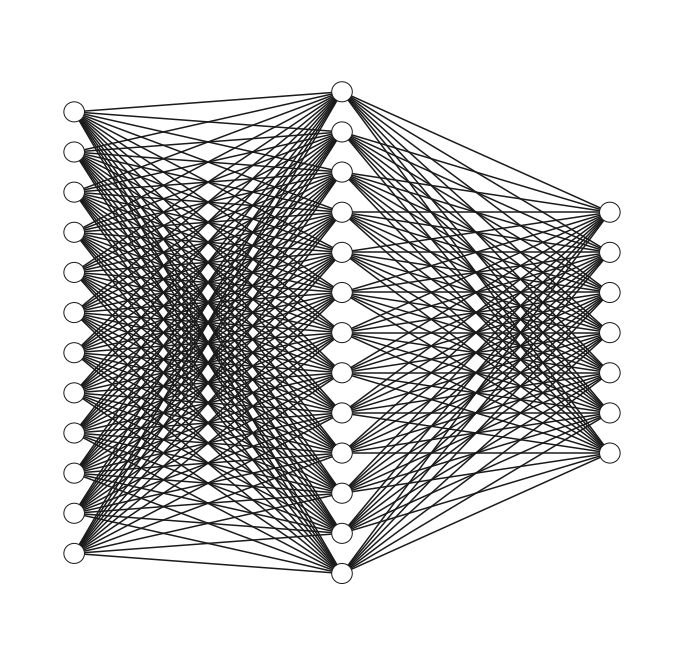

In [34]:
#plotting the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [12, 13, 7])

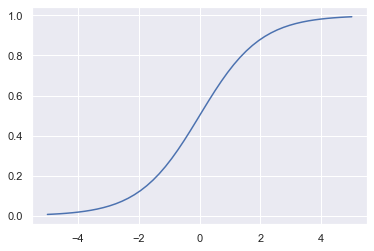

In [35]:
# sigmoid function representation
xp = np.linspace( -5, 5, 50 )
yp = 1 / ( 1 + np.exp( -xp ) )
plt.plot( xp, yp )

In [36]:
#back propagation for reducing error
error = []
b1=0
b2=0
learning_rate = 0.2 # slowly update the network
for epoch in range(1000):
    l1 = 1/(1 + np.exp(-(np.dot(X_train, w1) + b1))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2) +b2 )))
    er = (abs(y_train - l2)).mean()
    l2_delta = (y_train - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X_train.T.dot(l1_delta) * learning_rate
    error.append(er/(epoch*0.1))
    print('Error:', er)
#we updated the weights and biases of different layers    

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in double_scalars



Error: 0.4959643846653844
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Error: 0.13560056319900235
Er

Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.1356005631990024
Error: 0.135

Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
Error: 0.13560056319900238
E

In [37]:
er = set(error)

Text(0.5, 0, 'Epoch')

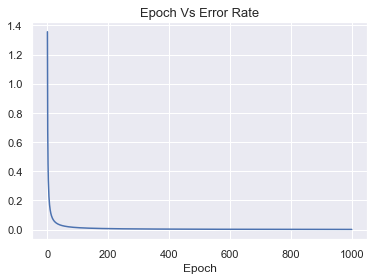

In [38]:
#epoch vs error graph after back propagation
sp = pd.Series(error)
sp.plot()
plt.title("Epoch Vs Error Rate",fontsize=13)
plt.xlabel("Epoch")


In [39]:
#normalizing the data between 0 & 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train

array([[-0.15057952,  0.99924214,  1.20301976, ...,  0.44176972,
         0.1893589 , -0.23149658],
       [-1.13786206,  0.99924214,  1.20301976, ...,  0.28448414,
        -0.23637226, -1.24408017],
       [-1.13786206,  0.99924214,  0.46494083, ...,  3.04569532,
        -0.23637226,  1.27984023],
       ...,
       [-1.13786206, -1.00075844,  0.46494083, ..., -0.38458042,
         1.92360567,  1.27984023],
       [-0.15057952, -1.00075844,  1.20301976, ...,  0.14750159,
        -0.74972219,  0.41610828],
       [-1.13786206, -1.00075844, -0.64462925, ..., -1.24126946,
         0.90457272,  0.41610828]])

In [41]:
#imporing the libraries required for model building
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future v

In [42]:
#fittting the model
classifier = Sequential()
# Adding the input layer and the first hidden layer
#rectified linear unit
classifier.add(Dense(output_dim=30, init='uniform', activation='relu', input_dim=12))
#classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

# Adding the output layer
classifier.add(Dense(output_dim=7, init='uniform', activation='sigmoid'))

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=30, kernel_initializer="uniform")`

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`

C:\Users\Rahul Mukthineni\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=7, kernel_initializer="uniform")`



In [42]:
#using adam optiizer
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
#training the model
classifier.fit(X_train, y_train, validation_split = 0.20, batch_size=100, epochs=1000,verbose=1)


Train on 1055 samples, validate on 264 samples
Epoch 1/1000
1055/1055 [==============================] - 0s 274us/step - loss: 0.6909 - accuracy: 0.8353 - val_loss: 0.6876 - val_accuracy: 0.8561
Epoch 2/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.6839 - accuracy: 0.8665 - val_loss: 0.6784 - val_accuracy: 0.8561
Epoch 3/1000
1055/1055 [==============================] - 0s 27us/step - loss: 0.6716 - accuracy: 0.8664 - val_loss: 0.6616 - val_accuracy: 0.8561
Epoch 4/1000
1055/1055 [==============================] - 0s 26us/step - loss: 0.6497 - accuracy: 0.8666 - val_loss: 0.6321 - val_accuracy: 0.8561
Epoch 5/1000
1055/1055 [==============================] - 0s 29us/step - loss: 0.6125 - accuracy: 0.8665 - val_loss: 0.5856 - val_accuracy: 0.8561
Epoch 6/1000
1055/1055 [==============================] - 0s 32us/step - loss: 0.5586 - accuracy: 0.8665 - val_loss: 0.5231 - val_accuracy: 0.8561
Epoch 7/1000
1055/1055 [==============================] - 0s 27us/ste

1055/1055 [==============================] - 0s 25us/step - loss: 0.2950 - accuracy: 0.8896 - val_loss: 0.3185 - val_accuracy: 0.8810
Epoch 110/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2959 - accuracy: 0.8894 - val_loss: 0.3185 - val_accuracy: 0.8804
Epoch 111/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2953 - accuracy: 0.8892 - val_loss: 0.3185 - val_accuracy: 0.8804
Epoch 112/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2967 - accuracy: 0.8902 - val_loss: 0.3186 - val_accuracy: 0.8804
Epoch 113/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2935 - accuracy: 0.8914 - val_loss: 0.3180 - val_accuracy: 0.8810
Epoch 114/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2942 - accuracy: 0.8883 - val_loss: 0.3181 - val_accuracy: 0.8810
Epoch 115/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2940 - accuracy: 0.8877 - val_loss: 0.

1055/1055 [==============================] - 0s 25us/step - loss: 0.2900 - accuracy: 0.8891 - val_loss: 0.3188 - val_accuracy: 0.8804
Epoch 165/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2901 - accuracy: 0.8919 - val_loss: 0.3193 - val_accuracy: 0.8804
Epoch 166/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2894 - accuracy: 0.8891 - val_loss: 0.3195 - val_accuracy: 0.8799
Epoch 167/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2894 - accuracy: 0.8894 - val_loss: 0.3190 - val_accuracy: 0.8810
Epoch 168/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2885 - accuracy: 0.8910 - val_loss: 0.3185 - val_accuracy: 0.8804
Epoch 169/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2903 - accuracy: 0.8899 - val_loss: 0.3186 - val_accuracy: 0.8804
Epoch 170/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2894 - accuracy: 0.8905 - val_loss: 0.

Epoch 219/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2859 - accuracy: 0.8902 - val_loss: 0.3196 - val_accuracy: 0.8826
Epoch 220/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2890 - accuracy: 0.8910 - val_loss: 0.3201 - val_accuracy: 0.8826
Epoch 221/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2878 - accuracy: 0.8910 - val_loss: 0.3196 - val_accuracy: 0.8826
Epoch 222/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2873 - accuracy: 0.8896 - val_loss: 0.3201 - val_accuracy: 0.8831
Epoch 223/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2869 - accuracy: 0.8900 - val_loss: 0.3197 - val_accuracy: 0.8826
Epoch 224/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2902 - accuracy: 0.8907 - val_loss: 0.3195 - val_accuracy: 0.8820
Epoch 225/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2863 - accuracy: 0.8894

Epoch 274/1000
1055/1055 [==============================] - 0s 26us/step - loss: 0.2863 - accuracy: 0.8898 - val_loss: 0.3208 - val_accuracy: 0.8820
Epoch 275/1000
1055/1055 [==============================] - 0s 32us/step - loss: 0.2856 - accuracy: 0.8921 - val_loss: 0.3204 - val_accuracy: 0.8815
Epoch 276/1000
1055/1055 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.88 - 0s 24us/step - loss: 0.2878 - accuracy: 0.8890 - val_loss: 0.3200 - val_accuracy: 0.8820
Epoch 277/1000
1055/1055 [==============================] - 0s 31us/step - loss: 0.2842 - accuracy: 0.8894 - val_loss: 0.3204 - val_accuracy: 0.8820
Epoch 278/1000
1055/1055 [==============================] - 0s 33us/step - loss: 0.2846 - accuracy: 0.8913 - val_loss: 0.3207 - val_accuracy: 0.8831
Epoch 279/1000
1055/1055 [==============================] - 0s 31us/step - loss: 0.2875 - accuracy: 0.8887 - val_loss: 0.3213 - val_accuracy: 0.8820
Epoch 280/1000
1055/1055 [==============================] - 0s 3

Epoch 329/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2852 - accuracy: 0.8925 - val_loss: 0.3212 - val_accuracy: 0.8826
Epoch 330/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2805 - accuracy: 0.8945 - val_loss: 0.3212 - val_accuracy: 0.8826
Epoch 331/1000
1055/1055 [==============================] - 0s 26us/step - loss: 0.2839 - accuracy: 0.8926 - val_loss: 0.3216 - val_accuracy: 0.8831
Epoch 332/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2842 - accuracy: 0.8925 - val_loss: 0.3217 - val_accuracy: 0.8831
Epoch 333/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2849 - accuracy: 0.8923 - val_loss: 0.3214 - val_accuracy: 0.8842
Epoch 334/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2851 - accuracy: 0.8921 - val_loss: 0.3215 - val_accuracy: 0.8842
Epoch 335/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2847 - accuracy: 0.8905

Epoch 384/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2841 - accuracy: 0.8915 - val_loss: 0.3233 - val_accuracy: 0.8847
Epoch 385/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2840 - accuracy: 0.8925 - val_loss: 0.3235 - val_accuracy: 0.8842
Epoch 386/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2825 - accuracy: 0.8917 - val_loss: 0.3233 - val_accuracy: 0.8847
Epoch 387/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2797 - accuracy: 0.8942 - val_loss: 0.3238 - val_accuracy: 0.8842
Epoch 388/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2811 - accuracy: 0.8934 - val_loss: 0.3241 - val_accuracy: 0.8847
Epoch 389/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2823 - accuracy: 0.8930 - val_loss: 0.3234 - val_accuracy: 0.8837
Epoch 390/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2842 - accuracy: 0.8915

Epoch 439/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2808 - accuracy: 0.8937 - val_loss: 0.3255 - val_accuracy: 0.8826
Epoch 440/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2810 - accuracy: 0.8911 - val_loss: 0.3257 - val_accuracy: 0.8815
Epoch 441/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2819 - accuracy: 0.8918 - val_loss: 0.3253 - val_accuracy: 0.8831
Epoch 442/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2808 - accuracy: 0.8921 - val_loss: 0.3247 - val_accuracy: 0.8826
Epoch 443/1000
1055/1055 [==============================] - 0s 26us/step - loss: 0.2808 - accuracy: 0.8934 - val_loss: 0.3249 - val_accuracy: 0.8820
Epoch 444/1000
1055/1055 [==============================] - 0s 26us/step - loss: 0.2803 - accuracy: 0.8932 - val_loss: 0.3256 - val_accuracy: 0.8826
Epoch 445/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2835 - accuracy: 0.8942

Epoch 494/1000
1055/1055 [==============================] - 0s 27us/step - loss: 0.2765 - accuracy: 0.8960 - val_loss: 0.3270 - val_accuracy: 0.8820
Epoch 495/1000
1055/1055 [==============================] - 0s 27us/step - loss: 0.2811 - accuracy: 0.8928 - val_loss: 0.3268 - val_accuracy: 0.8820
Epoch 496/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2786 - accuracy: 0.8921 - val_loss: 0.3261 - val_accuracy: 0.8831
Epoch 497/1000
1055/1055 [==============================] - 0s 26us/step - loss: 0.2802 - accuracy: 0.8932 - val_loss: 0.3259 - val_accuracy: 0.8831
Epoch 498/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2793 - accuracy: 0.8928 - val_loss: 0.3259 - val_accuracy: 0.8831
Epoch 499/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2805 - accuracy: 0.8942 - val_loss: 0.3257 - val_accuracy: 0.8826
Epoch 500/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2789 - accuracy: 0.8922

Epoch 549/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2761 - accuracy: 0.8926 - val_loss: 0.3274 - val_accuracy: 0.8820
Epoch 550/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2796 - accuracy: 0.8929 - val_loss: 0.3278 - val_accuracy: 0.8826
Epoch 551/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2753 - accuracy: 0.8949 - val_loss: 0.3272 - val_accuracy: 0.8826
Epoch 552/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2762 - accuracy: 0.8940 - val_loss: 0.3271 - val_accuracy: 0.8826
Epoch 553/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2768 - accuracy: 0.8923 - val_loss: 0.3280 - val_accuracy: 0.8820
Epoch 554/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2808 - accuracy: 0.8913 - val_loss: 0.3273 - val_accuracy: 0.8815
Epoch 555/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2792 - accuracy: 0.8921

Epoch 604/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2779 - accuracy: 0.8932 - val_loss: 0.3285 - val_accuracy: 0.8815
Epoch 605/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2742 - accuracy: 0.8938 - val_loss: 0.3290 - val_accuracy: 0.8815
Epoch 606/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2750 - accuracy: 0.8953 - val_loss: 0.3298 - val_accuracy: 0.8826
Epoch 607/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2760 - accuracy: 0.8933 - val_loss: 0.3298 - val_accuracy: 0.8820
Epoch 608/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2777 - accuracy: 0.8941 - val_loss: 0.3298 - val_accuracy: 0.8820
Epoch 609/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2770 - accuracy: 0.8953 - val_loss: 0.3298 - val_accuracy: 0.8820
Epoch 610/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2759 - accuracy: 0.8942

Epoch 659/1000
1055/1055 [==============================] - 0s 27us/step - loss: 0.2750 - accuracy: 0.8952 - val_loss: 0.3316 - val_accuracy: 0.8804
Epoch 660/1000
1055/1055 [==============================] - 0s 28us/step - loss: 0.2759 - accuracy: 0.8925 - val_loss: 0.3311 - val_accuracy: 0.8799
Epoch 661/1000
1055/1055 [==============================] - 0s 30us/step - loss: 0.2744 - accuracy: 0.8932 - val_loss: 0.3318 - val_accuracy: 0.8810
Epoch 662/1000
1055/1055 [==============================] - 0s 32us/step - loss: 0.2755 - accuracy: 0.8942 - val_loss: 0.3317 - val_accuracy: 0.8799
Epoch 663/1000
1055/1055 [==============================] - 0s 30us/step - loss: 0.2737 - accuracy: 0.8921 - val_loss: 0.3318 - val_accuracy: 0.8804
Epoch 664/1000
1055/1055 [==============================] - 0s 31us/step - loss: 0.2764 - accuracy: 0.8913 - val_loss: 0.3311 - val_accuracy: 0.8793
Epoch 665/1000
1055/1055 [==============================] - 0s 31us/step - loss: 0.2753 - accuracy: 0.8937

Epoch 714/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2754 - accuracy: 0.8925 - val_loss: 0.3351 - val_accuracy: 0.8799
Epoch 715/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2743 - accuracy: 0.8930 - val_loss: 0.3348 - val_accuracy: 0.8793
Epoch 716/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2748 - accuracy: 0.8928 - val_loss: 0.3349 - val_accuracy: 0.8793
Epoch 717/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2713 - accuracy: 0.8945 - val_loss: 0.3348 - val_accuracy: 0.8793
Epoch 718/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2725 - accuracy: 0.8942 - val_loss: 0.3355 - val_accuracy: 0.8793
Epoch 719/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2726 - accuracy: 0.8972 - val_loss: 0.3349 - val_accuracy: 0.8793
Epoch 720/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2746 - accuracy: 0.8941

Epoch 769/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2746 - accuracy: 0.8949 - val_loss: 0.3383 - val_accuracy: 0.8782
Epoch 770/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2740 - accuracy: 0.8941 - val_loss: 0.3379 - val_accuracy: 0.8777
Epoch 771/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2721 - accuracy: 0.8971 - val_loss: 0.3379 - val_accuracy: 0.8782
Epoch 772/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2743 - accuracy: 0.8933 - val_loss: 0.3375 - val_accuracy: 0.8777
Epoch 773/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2751 - accuracy: 0.8937 - val_loss: 0.3375 - val_accuracy: 0.8772
Epoch 774/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2721 - accuracy: 0.8970 - val_loss: 0.3373 - val_accuracy: 0.8772
Epoch 775/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2724 - accuracy: 0.8952

Epoch 824/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2723 - accuracy: 0.8940 - val_loss: 0.3386 - val_accuracy: 0.8782
Epoch 825/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2699 - accuracy: 0.8963 - val_loss: 0.3385 - val_accuracy: 0.8782
Epoch 826/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2725 - accuracy: 0.8934 - val_loss: 0.3392 - val_accuracy: 0.8777
Epoch 827/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2750 - accuracy: 0.8928 - val_loss: 0.3395 - val_accuracy: 0.8772
Epoch 828/1000
1055/1055 [==============================] - 0s 19us/step - loss: 0.2709 - accuracy: 0.8948 - val_loss: 0.3391 - val_accuracy: 0.8777
Epoch 829/1000
1055/1055 [==============================] - 0s 24us/step - loss: 0.2711 - accuracy: 0.8965 - val_loss: 0.3385 - val_accuracy: 0.8777
Epoch 830/1000
1055/1055 [==============================] - 0s 45us/step - loss: 0.2754 - accuracy: 0.8925

Epoch 879/1000
1055/1055 [==============================] - 0s 27us/step - loss: 0.2719 - accuracy: 0.8942 - val_loss: 0.3405 - val_accuracy: 0.8772
Epoch 880/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2721 - accuracy: 0.8929 - val_loss: 0.3409 - val_accuracy: 0.8782
Epoch 881/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2662 - accuracy: 0.8983 - val_loss: 0.3406 - val_accuracy: 0.8777
Epoch 882/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2683 - accuracy: 0.8952 - val_loss: 0.3412 - val_accuracy: 0.8782
Epoch 883/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2662 - accuracy: 0.8957 - val_loss: 0.3409 - val_accuracy: 0.8777
Epoch 884/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2698 - accuracy: 0.8959 - val_loss: 0.3410 - val_accuracy: 0.8777
Epoch 885/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2715 - accuracy: 0.8938

Epoch 934/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2723 - accuracy: 0.8928 - val_loss: 0.3425 - val_accuracy: 0.8788
Epoch 935/1000
1055/1055 [==============================] - 0s 20us/step - loss: 0.2664 - accuracy: 0.8970 - val_loss: 0.3426 - val_accuracy: 0.8788
Epoch 936/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2678 - accuracy: 0.8953 - val_loss: 0.3421 - val_accuracy: 0.8799
Epoch 937/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2710 - accuracy: 0.8960 - val_loss: 0.3422 - val_accuracy: 0.8804
Epoch 938/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2697 - accuracy: 0.8975 - val_loss: 0.3429 - val_accuracy: 0.8804
Epoch 939/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2668 - accuracy: 0.8967 - val_loss: 0.3426 - val_accuracy: 0.8804
Epoch 940/1000
1055/1055 [==============================] - 0s 43us/step - loss: 0.2694 - accuracy: 0.8945

Epoch 989/1000
1055/1055 [==============================] - 0s 23us/step - loss: 0.2646 - accuracy: 0.8967 - val_loss: 0.3429 - val_accuracy: 0.8804
Epoch 990/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2684 - accuracy: 0.8949 - val_loss: 0.3438 - val_accuracy: 0.8799
Epoch 991/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2639 - accuracy: 0.8959 - val_loss: 0.3433 - val_accuracy: 0.8793
Epoch 992/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2677 - accuracy: 0.8970 - val_loss: 0.3437 - val_accuracy: 0.8799
Epoch 993/1000
1055/1055 [==============================] - 0s 21us/step - loss: 0.2692 - accuracy: 0.8940 - val_loss: 0.3427 - val_accuracy: 0.8804
Epoch 994/1000
1055/1055 [==============================] - 0s 25us/step - loss: 0.2684 - accuracy: 0.8970 - val_loss: 0.3431 - val_accuracy: 0.8815
Epoch 995/1000
1055/1055 [==============================] - 0s 22us/step - loss: 0.2681 - accuracy: 0.8978

In [59]:
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
y_pred

array([[0.49986234, 0.49994332, 0.5001083 , ..., 0.50006086, 0.500078  ,
        0.4999103 ],
       [0.49970785, 0.49980634, 0.5002836 , ..., 0.50003695, 0.4998115 ,
        0.49994403],
       [0.49976408, 0.49995506, 0.50027245, ..., 0.49979815, 0.49977815,
        0.49979416],
       ...,
       [0.49969062, 0.49982077, 0.50018716, ..., 0.50003475, 0.4998843 ,
        0.49986884],
       [0.49981126, 0.49973005, 0.5005458 , ..., 0.49983847, 0.4998803 ,
        0.499971  ],
       [0.5000476 , 0.49998313, 0.50034195, ..., 0.4998106 , 0.49992085,
        0.4998185 ]], dtype=float32)

In [100]:
accu = metrics.accuracy_score(y_test,pred)
accu

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

# SVM classification


In [45]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=2,random_state=0)
svm.fit(X_train1, y_train1.ravel())

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
X_train1

array([[-0.07854,  0.48246,  1.16365, ...,  0.41594,  0.19268, -0.21575],
       [-0.95197,  0.48246,  1.16365, ...,  0.25953, -0.21712, -1.18084],
       [-0.95197,  0.48246,  0.45468, ...,  3.00537, -0.21712,  1.2247 ],
       ...,
       [-0.95197, -0.48246,  0.45468, ..., -0.40581,  1.86203,  1.2247 ],
       [-0.07854, -0.48246,  1.16365, ...,  0.12331, -0.71126,  0.40148],
       [-0.95197, -0.48246, -0.61113, ..., -1.25773,  0.88113,  0.40148]])

In [47]:
X_test1

array([[ 0.49788, -0.48246,  1.16365, ...,  0.41594, -1.37983, -2.07848],
       [ 1.09449,  0.48246,  0.45468, ...,  0.7583 , -2.55524, -0.52593],
       [-0.95197,  0.48246,  0.45468, ...,  0.93949,  0.19268, -0.21575],
       ...,
       [ 0.49788,  0.48246,  1.16365, ...,  0.93949, -0.21712, -0.84637],
       [-0.07854,  0.48246, -0.61113, ...,  0.41594,  1.29221,  1.92173],
       [-0.95197, -0.48246, -0.61113, ..., -1.5184 ,  1.29221,  0.40148]])

In [48]:
y_train1

array([[0],
       [0],
       [3],
       ...,
       [2],
       [0],
       [3]])

In [49]:
y_test1

array([[0],
       [0],
       [3],
       [0],
       [3],
       [3],
       [0],
       [2],
       [2],
       [0],
       [2],
       [4],
       [0],
       [0],
       [0],
       [0],
       [3],
       [6],
       [0],
       [0],
       [0],
       [2],
       [6],
       [0],
       [0],
       [1],
       [0],
       [0],
       [3],
       [0],
       [4],
       [1],
       [0],
       [2],
       [0],
       [2],
       [6],
       [0],
       [0],
       [3],
       [6],
       [1],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [1],
       [3],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [3],
       [2],
       [6],
       [0],
       [5],
       [1],
       [0],
       [6],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [3],
       [0],
       [6],
       [0],
       [0],
       [2],
    

In [50]:
import sklearn.metrics as metrics

In [51]:
pred = svm.predict(X_test1)
accu = metrics.accuracy_score(y_test1,pred)
accu

0.5406360424028268

# SVM for binary Classification


In [52]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
predicted_class_names = ['User_Benzos']

X = copy_df[feature_col_names].values
y = copy_df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
X

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [54]:
y

array([['User'],
       ['Non-user'],
       ['Non-user'],
       ...,
       ['User'],
       ['Non-user'],
       ['User']], dtype=object)

In [55]:
svm = SVC(kernel="linear", C=1,random_state=0)
svm.fit(X_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
pred = svm.predict(X_test1)
accu = metrics.accuracy_score(y_test,pred)
print("\nAcuuracy Of the Model: ",accu,"\n\n")


Acuuracy Of the Model:  0.6996466431095406 




# Decision Tree for Binary Classification

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [58]:
pred = clf_dtc.predict(X_test1)
accu = metrics.accuracy_score(y_test,pred)
accu

0.6908127208480566

In [2]:
from plotly.offline import iplot

In [3]:

import plotly.graph_objs as go
labels = ["SVM","Decision Trees"]
usage = [69.99,69.08]
data = [go.Bar(x = labels,y = usage)]
fig = go.Figure(data=data)
iplot(fig)